### Convexity Defects
Any deviation of the object from hull can be considered as convexity defect.

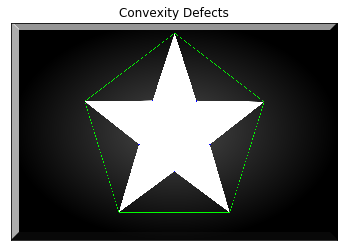

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('star.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
image, contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

    
plt.imshow(img),plt.title('Convexity Defects')
plt.xticks([]), plt.yticks([])

plt.show()

### Point Polygon Test
This function finds the shortest distance between a point in the image and a contour. It returns the distance which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.

In [12]:
## checking point 50,50
dist = cv2.pointPolygonTest(cnt, (50,50), True)

##checking point 500,500
## In the function, third argument is measureDist. If it is True, it finds the signed distance. 
## If False, it finds whether the point is inside or outside or on the contour (it returns +1, -1, 0 respectively).
dist2 = cv2.pointPolygonTest(cnt, (500,500), False)

print(dist)
print(dist2)

-591.6299519125109
1.0


### Match Shapes
This function compares two shapes, or two contours and returns a metric showing the similarity. 
The lower the result, the better match is. It is calculated based on the hu-moment values.

In [15]:
## comparing 2 pictures of similar stars
import cv2
import numpy as np

img1 = cv2.imread('star.png',0)
img2 = cv2.imread('star2.png',0)

ret, thresh = cv2.threshold(img1, 127, 255,0)
ret, thresh2 = cv2.threshold(img2, 127, 255,0)
image,contours,hierarchy = cv2.findContours(thresh,2,1)
cnt1 = contours[0]
image,contours,hierarchy = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print(ret)

0.0333113745602005


In [16]:
## comparing picture to itself
import cv2
import numpy as np

img1 = cv2.imread('star.png',0)
img2 = cv2.imread('star.png',0)

ret, thresh = cv2.threshold(img1, 127, 255,0)
ret, thresh2 = cv2.threshold(img2, 127, 255,0)
image,contours,hierarchy = cv2.findContours(thresh,2,1)
cnt1 = contours[0]
image,contours,hierarchy = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print(ret)

0.0
